In [1]:
import pandas as pd
%conda install -c conda-forge pandasql

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandasql as psql

In [3]:
water = pd.read_csv('water_potability.csv')

In [4]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
seed_choice = 7
seed = rand.Random(7)

#Removing the NaN values for water data (only NaN values were in ph, sulfate and trihalomethanes)
waternonan = psql.sqldf('select * from water where ph is not null and Sulfate is not null and Trihalomethanes is not null')

In [53]:
#shuffling data
waternonan = waternonan.sample(frac=1)

waternonan

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1266,7.301563,177.662895,23441.267143,9.107017,326.290630,478.467047,14.003396,55.183347,2.774961,0
1044,7.700362,220.571796,29432.208251,6.356294,322.750328,444.957618,13.027439,77.829802,3.786487,0
1224,7.773758,251.462844,21688.616943,6.194910,395.088245,355.831683,14.324552,67.584311,4.040974,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
316,5.980357,181.258705,11826.294275,3.688504,356.166613,543.347976,8.828689,60.206381,4.247240,0
...,...,...,...,...,...,...,...,...,...,...
152,6.581878,272.982745,37169.444404,8.114731,416.083481,351.476839,15.129334,79.261026,4.201663,0
1551,6.317577,143.299959,22577.818935,5.690078,338.897200,573.814744,15.315515,48.973887,3.399048,0
1295,7.910641,190.427600,16461.502324,5.454476,394.305876,294.178639,17.658652,82.417022,3.886603,0
646,7.184973,201.079219,25234.427972,5.216684,283.744612,384.011558,12.427538,23.136611,3.665411,0


In [54]:
#checking no NaN anywhere
check_nan = waternonan['ph' or 'Trihalomethanes' or 'Hardness' or 'Solids' or 'Chloramines' or 'Sulfate' or 'Conductivity' or 'Organic_carbon' or 'Turbidity' or 'Potability'].isnull().sum()
print(check_nan)

0


In [55]:
#data visualisation
import matplotlib.pyplot as plt
import numpy as np

In [56]:
#plt.hist(waternonan.ph)

In [57]:
#plt.hist(waternonan.Trihalomethanes)


In [58]:
#plt.hist(waternonan.Hardness)


In [59]:
#plt.hist(waternonan.Solids)


In [60]:
#plt.hist(waternonan.Chloramines)


In [61]:
#plt.hist(waternonan.Sulfate)


In [62]:
#plt.hist(waternonan.Conductivity)


In [63]:
#plt.hist(waternonan.Organic_carbon)


In [64]:
#plt.hist(waternonan.Turbidity)


In [65]:
#plt.hist(waternonan.Potability)

In [66]:
#corellation heat map
import seaborn as sns

<AxesSubplot:>

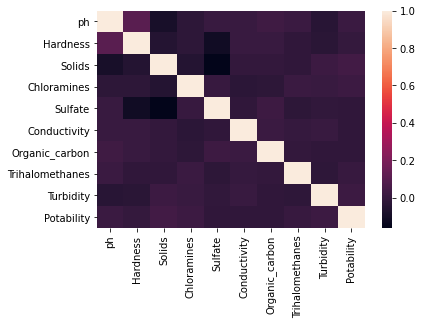

In [67]:
sns.heatmap(waternonan.corr())
#Upshot: not many extraneous variables

In [68]:
#Creating test-train split in data
import random as rand


In [69]:
# 80-20 split training data
index_list = seed.sample(range(2010), 1609)
train_set = waternonan.iloc[index_list]
train_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
712,7.623500,170.427572,36267.266658,6.040735,301.219091,404.501369,12.495658,79.946113,4.764995,1
1375,7.786735,192.179739,28086.873498,7.157952,329.708632,327.380488,10.681349,52.415462,1.961475,0
1797,9.764658,119.164010,38781.457422,9.334632,380.230634,512.331846,14.967733,59.193176,3.024571,0
1908,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0
566,7.592672,177.080839,14912.225506,6.041144,349.240614,355.284442,17.161966,42.115257,3.341427,0
...,...,...,...,...,...,...,...,...,...,...
1182,6.742622,209.217344,15488.956748,7.452362,351.052242,408.853562,13.921282,70.205241,4.964673,1
1019,5.467401,197.028926,12883.163531,9.264883,347.421266,355.175712,12.762546,67.159532,3.717823,0
1945,7.273368,175.015083,14206.357323,7.839067,337.644573,322.490689,18.107842,58.181707,4.196421,1
1117,6.980727,200.467226,30862.784459,6.196276,391.666878,422.489596,9.066902,48.250468,5.437619,0


In [70]:
# test data
test_data = waternonan.iloc[waternonan.index.difference(index_list)]
test_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
705,7.535700,221.792481,14829.745971,6.701159,366.412200,583.436488,17.731882,59.686076,4.208354,1
764,5.214009,192.648846,34184.308402,5.783357,282.969879,380.428415,15.867751,80.498498,4.453526,0
1887,10.817831,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
1213,6.549125,194.276857,7412.798059,5.836980,354.821194,361.037238,11.672191,57.316977,4.421059,1
721,11.244507,169.403655,43533.657845,5.888460,341.029600,336.446655,16.089710,59.494026,2.929953,1
...,...,...,...,...,...,...,...,...,...,...
197,7.821971,157.181545,23318.187976,9.084040,324.851659,294.636531,17.186766,72.568376,3.532958,1
1085,6.261111,270.466171,8572.421509,9.922076,286.327562,490.942651,12.926435,22.219327,4.753019,0
1438,7.617033,242.989402,17681.272357,2.855790,298.413238,549.987318,10.065225,76.513170,4.299543,1
1443,6.747415,250.419555,24539.713165,2.397985,358.229866,339.344740,15.357290,59.990770,3.377451,1


In [71]:
#starting the pipeline
# preprocessing
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold

# model training/tuning
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 

# models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# model validation
from sklearn.metrics import confusion_matrix, classification_report


# dataframe viewing rows
pd.set_option('display.max_rows', 100)

In [72]:
feature_list = ['ph', # indicate ph
                'Hardness', # indicates hardness
                'Solids', # indicates solids
                'Chloramines', # indicates Chloramines
                'Sulfate', # indicates Sulfate
                'Conductivity', # indicates Conductivity
                'Organic_carbon', # indicates Organic_carbon
                'Trihalomethanes', # indicates Trihalomethanes
                'Turbidity'] # indicates Turbidity

In [73]:
# define feature column data, list of features feature_list was created in the section above
X = waternonan[feature_list].values

# define label column
y = waternonan['Potability'].values

In [74]:
# make 75/25 train/test split, stratified because I have imbalanced label
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed_choice)

In [75]:
# check size of data splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1608, 9)
(403, 9)
(1608,)
(403,)


In [76]:
# Define scaler step of pipeline
scaler = Normalizer()

In [77]:
# Define machine learning models

# Logistic Regression:
lr = LogisticRegression(random_state=seed_choice)

# K-nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=10)

# Naive Bayes:
nb = GaussianNB()

# Random Forest:
rf = RandomForestClassifier(random_state=seed_choice)

# Gradient Boosted Trees:
gb = GradientBoostingClassifier()

# select model to train:
model_name = rf

In [78]:
# make pipeline steps
pipe = make_pipeline(scaler,model_name)

# fit data to model
pipe.fit(X_train, y_train)

# save predictions on test set
predictions = model_name.predict(X_test)

# print summary statistics
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))
print(classification_report(y_test, predictions, digits=5))

# plot confusion matrix
cm = confusion_matrix(y_test, predictions, normalize='all')
print(cm)

Training set score: 1.0
Test set score: 0.607940446650124
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[[0.        0.5955335]
 [0.        0.4044665]]


/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# create loop to test all models at once

model_names = [lr, knn, nb, rf, gb]
for name in model_names:
    print('training model:' + str(name))
    
    # define model name
    model_name = name
    
    # make pipeline steps
    pipe = make_pipeline(scaler,model_name)

    # fit data to model
    pipe.fit(X_train, y_train)

    # save predictions on test set
    predictions = model_name.predict(X_test)

    # print summary statistics
    print('Training set score: ' + str(pipe.score(X_train,y_train)))
    print('Test set score: ' + str(pipe.score(X_test,y_test)))
    print(classification_report(y_test, predictions, digits=5))
#for debugging
    print(predictions)

    # plot confusion matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    print(cm)

training model:LogisticRegression(random_state=7)
Training set score: 0.5970149253731343
Test set score: 0.5955334987593052
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40299   0.99387   0.57345       163

    accuracy                        0.40199       403
   macro avg    0.20149   0.49693   0.28673       403
weighted avg    0.16299   0.40199   0.23194       403

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set score: 1.0
Test set score: 0.607940446650124
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set score: 0.7997512437810945
Test set score: 0.5955334987593052
              precision    recall  f1-score   support

           0    0.59553   1.00000   0.74650       240
           1    0.00000   0.00000   0.00000       163

    accuracy                        0.59553       403
   macro avg    0.29777   0.50000   0.37325       403
weighted avg    0.35466   0.59553   0.44457       403

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
